# Pre-requisite Test
## Sakshi Jain
## 20110181
## Dual Major B.Tech

In [89]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
from jax import grad
import jax.numpy as jnp

### Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In matrix multiplication, each element in a row of the first matrix is multiplied by its corresponding element in a column of the second matrix, and the results are then added together. The resulting matrix will have a size of (n, m) if you have a matrix of size (n, k) and a matrix of size (k, m).

So, in order to calculate every element in the final matrix, we need to peform k multiplications and k-1 additions. Also the size of the resulting matrix is (n,m), so total elements in the final matrix will be n*m. So for all elements in final matrix, the total number of multiplication will be n*m*k and total number of additions will be n*m*(k-1) for the matrix multiplication of matrices of size (n,k) and (k,m).

### Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [11]:
def matrix_multiply_list(A, B):
    res = [[0] * len(B[0]) for _ in range(len(A))]
    
    for row in range(len(A)):
        for col in range(len(B[0])):
            for k in range(len(A[0])):
                res[row][col] += A[row][k] * B[k][col]
    
    return res

In [10]:
import numpy as np

def matrix_multiply_numpy(A, B):
    return np.matmul(A, B)

In [16]:
import time

A_random=np.random.rand(56,78)
B_random=np.random.rand(78,89)

st_lists = time.time()
res_list = matrix_multiply_list(A_random,B_random)
et_lists = time.time()
tt_lists = et_lists - st_lists
# print("Result using lists of lists:", res_list)
print("Time taken using lists:", tt_lists)

Time taken using lists: 0.1397700309753418


In [17]:
st_numpy = time.time()
res_numpy = matrix_multiply_numpy(A_random, B_random)
et_numpy = time.time()
tt_numpy = et_numpy - st_numpy
# print("Result using NumPy:", res_numpy)
print("Time taken using numpy:", tt_numpy)

Time taken using numpy: 0.020684003829956055


In [26]:
import timeit
print("Using timeit for numpy:")
%timeit matrix_multiply_numpy(A_random, B_random)
print("Using timeit for lists:")
%timeit matrix_multiply_list(A_random,B_random)

Using timeit for numpy:
54.1 µs ± 4.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Using timeit for lists:
99.6 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The matrix multiplication using numpy takes lesser time than the conventional method as it is in micro seconds and for lists, time is in miliseconds. timeit does a number of iterations and finds the execution time by calculating the mean. The matmul takes O(n^2.371552) given by Williams, Xu, Xu, and Zhou,and the conventional method takes O(n^3) time. So numpy is better.

### Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

The median of a list of size n is the ((n+1)/2)th highest element when n is 'odd' and mean of (n/2)th and ((n/2)+1)th highest element for even 'n'. 
Using the given approach of finding iteratively the highest element in one pass, second highest element in 2nd pass, finding the ((n+1)/2)th highest element takes ((n+1)/2) passes. Each pass is of time complexity O(n), thus the time complexity of the algorithm is O(n^2).

A better method would be to sort the list first which can be done in time complexity of O(n*log(n)) and then directly choose the((n+1)/2)th element in the sorted list in O(1) time complexity. Hence, the time complexity of this algorithm is O(nlog(n)).


In [121]:
def median_method1(arr):
    n = len(arr)
    a = arr
    med = 0
    for i in range(n):
        m = a[0]
        ind = 0
        for j in range(n-i):
            if(a[j] > m):
                m = a[j]
                ind = j
        a[ind],a[n-i-1] = a[n-i-1],a[ind]
    x = (int)(n/2)
    if(n%2 != 0):
        med = a[x]
    else:
        med = (a[x-1] + a[x])/2
    return med

In [122]:
def median_method2(arr):
    n = len(arr)
    a = arr
    a.sort()
    med = 0
    x = (int)(n/2)
    if(n%2 != 0):
        med = a[x]
    else:
        med = (a[x-1] + a[x])/2
    return med

In [123]:
arr = np.random.rand(50)

start = time.time()
med = median_method1(arr)
end = time.time()
print("Time taken in method 1 is", end-start)
print("median is ", med)

start = time.time()
med = median_method2(arr)
end = time.time()
print("Time taken in method 2 is", end-start)
print("median is ", med)

start = time.time()
med = np.median(arr)
end = time.time()
print("Time taken in numpy method is", end-start)
print("median is ", med)

Time taken in method 1 is 0.0004420280456542969
median is  0.513717491729895
Time taken in method 2 is 0.00012493133544921875
median is  0.513717491729895
Time taken in numpy method is 0.00034928321838378906
median is  0.513717491729895


Method 2 is best, finding the median in O(nlogn) time.

### Q4. What is the gradient of the following function with respect to x and y?

gradient wrt to x = 2xy+(y^3)cos(x)


gradient wrt to y = (x^2)+3(y^2) sin(x)

### Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [58]:
x=0.54
y=3.0

df_dx = 2*x*y+(y**3)*jnp.cos(x)

df_dy = (x*x)+3*(y**2)*jnp.sin(x)
print(df_dx,df_dy)

26.398134 14.173273


In [59]:
def func(x,y):
    return (x*x*y)+ (y**3)*jnp.sin(x)


In [60]:
df_dx = grad(func,argnums=0)
df_dy = grad(func,argnums=1)

print(df_dx(0.54,3.0),df_dy(0.54,3.0))


26.398136 14.173273


### Q6. Use sympy to confirm that you obtain the same gradient analytically.


In [64]:
def func(x,y):
    return (x*x*y)+ (y**3)*sin(x)

In [67]:
x = Symbol('x')
y = Symbol('y')

print(diff(func(x,y),x))
print(diff(func(x,y),y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


### Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [87]:
years = ['2022','2023','2024','2025']
branches = ['Branch1', 'Branch2']
students_record = {}
r_no = 1
for year in years:
    students_record[year] = {}
    for branch in branches:
        students_record[year][branch] = []
        st = {
        "Roll Number" : r_no,
        "Name" : "N",
        "Marks" : {
            "Maths" : 80,
            "English" : 95,
            "Hindi": 90,
            "Computer Science": 100
            }
        }
        students_record[year][branch].append(st)
        r_no+=1
    
print(students_record)

{'2022': {'Branch1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}], 'Branch2': [{'Roll Number': 2, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}]}, '2023': {'Branch1': [{'Roll Number': 3, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}], 'Branch2': [{'Roll Number': 4, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}]}, '2024': {'Branch1': [{'Roll Number': 5, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}], 'Branch2': [{'Roll Number': 6, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}]}, '2025': {'Branch1': [{'Roll Number': 7, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}}], 'Branch2': [{'Roll Number': 8, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 95, 'Hindi': 90, 'Com

### Q8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [88]:
class Student:
    def __init__(self, name, roll_number):
        self.name = name
        self.roll_number = roll_number
        self.marks = {}

    def add_subject(self, subject, mark):
        self.marks[subject] = mark

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

database = []

for year in years:
    year_object = Year(year)
    
    for branch in branches:
        branch_object = Branch(branch)

        for roll_no in range(1, 4): 
            student_name = "N"
            student_object = Student(name=student_name, roll_number=roll_no)
            student_object.add_subject('Maths', 80)
            student_object.add_subject('English', 95)
            student_object.add_subject('Hindi', 90)
            student_object.add_subject('Computer Science', 100)

            branch_object.add_student(student_object)

        year_object.add_branch(branch_object)

    database.append(year_object)


for year_object in database:
    print(f"Year: {year_object.year}")
    
    for branch_object in year_object.branches:
        print(f"  Branch: {branch_object.name}")
        
        for student_object in branch_object.students:
            print(f"    Student: {student_object.name}, Roll Number: {student_object.roll_number}, Marks: {student_object.marks}")




Year: 2022
  Branch: Branch1
    Student: N, Roll Number: 1, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
    Student: N, Roll Number: 2, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
    Student: N, Roll Number: 3, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
  Branch: Branch2
    Student: N, Roll Number: 1, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
    Student: N, Roll Number: 2, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
    Student: N, Roll Number: 3, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
Year: 2023
  Branch: Branch1
    Student: N, Roll Number: 1, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
    Student: N, Roll Number: 2, Marks: {'Maths': 80, 'English': 95, 'Hindi': 90, 'Computer Science': 100}
    Student: N, Roll Number: 3, Marks: {'Maths': 80, 'English': 95, 'Hindi':

### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

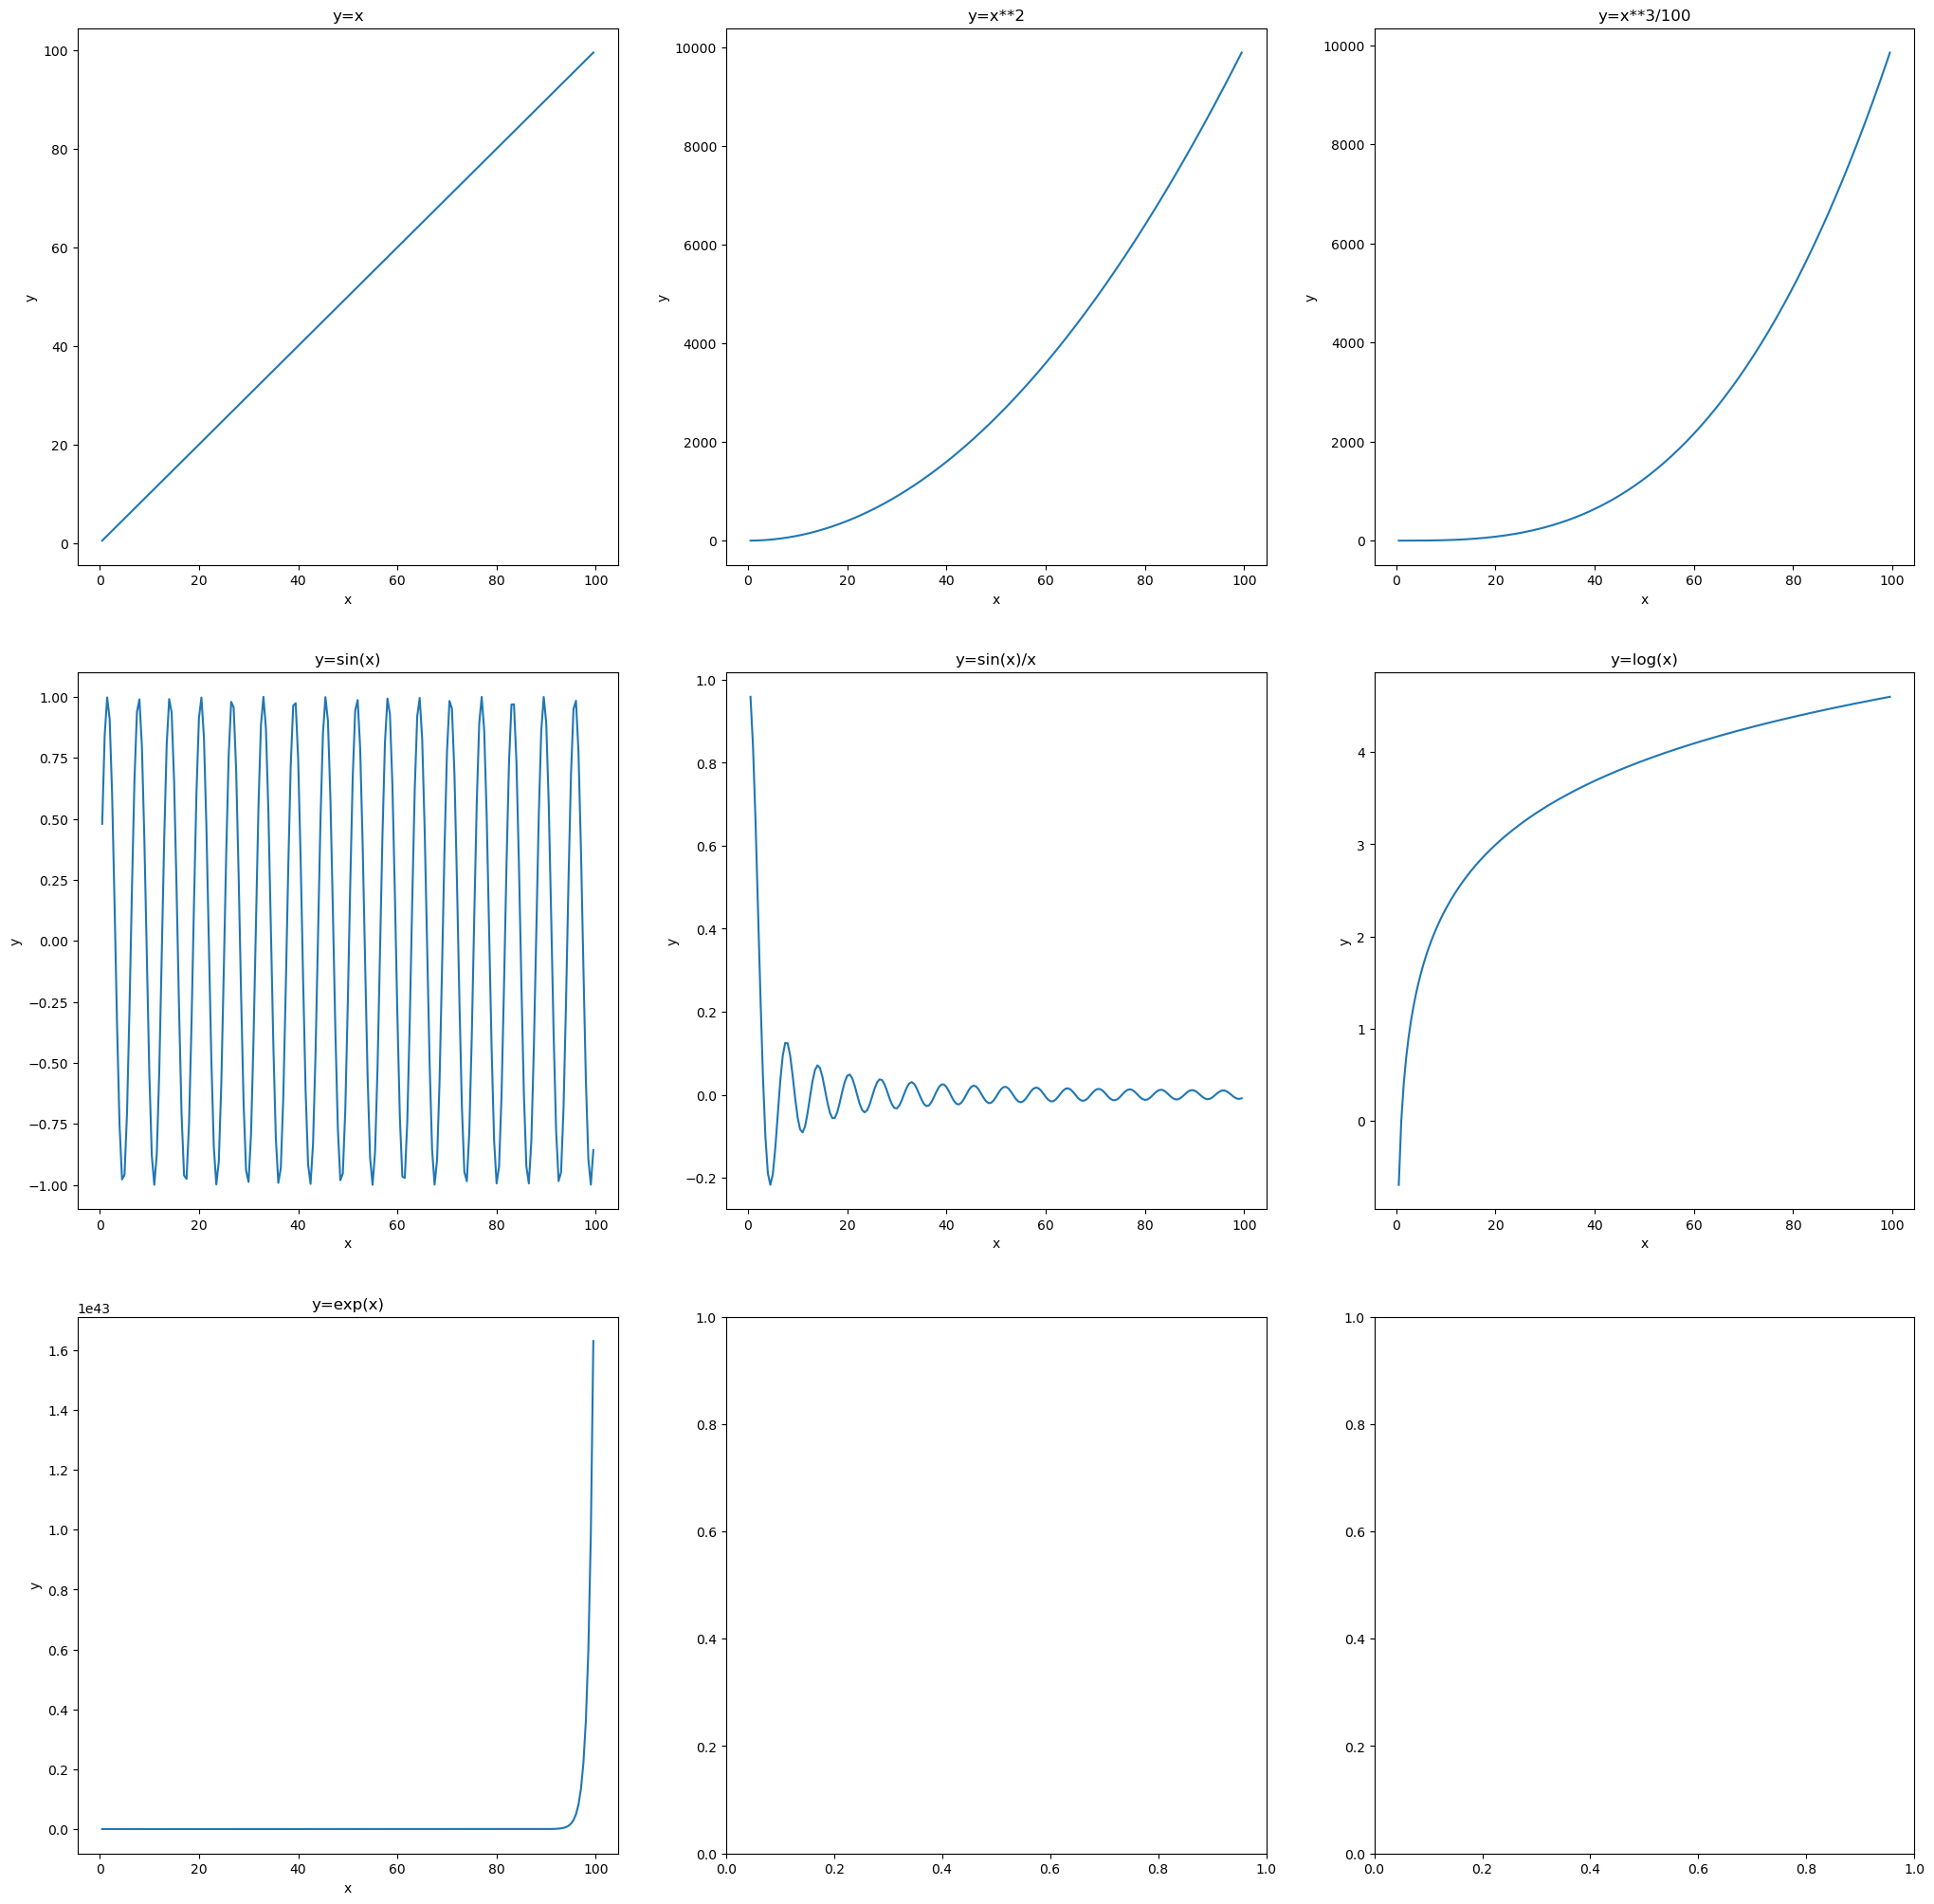

In [90]:
x = np.arange(0.5,100,0.5)

f,ax=plt.subplots(3,3,figsize=(25,25))
ax = ax.flat

#1
y = x
ax[0].plot(x,y)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("y=x")

#2
y = x*x
ax[1].plot(x,y)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("y=x**2")


#3
y = (x**3)/100
ax[2].plot(x,y)
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
ax[2].set_title("y=x**3/100")

#4
y = np.sin(x)
ax[3].plot(x,y)
ax[3].set_xlabel("x")
ax[3].set_ylabel("y")
ax[3].set_title("y=sin(x)")

#5
y = np.sin(x)/x
ax[4].plot(x,y)
ax[4].set_xlabel("x")
ax[4].set_ylabel("y")
ax[4].set_title("y=sin(x)/x")

#6
y = np.log(x)
ax[5].plot(x,y)
ax[5].set_xlabel("x")
ax[5].set_ylabel("y")
ax[5].set_title("y=log(x)")

#7
y = np.exp(x)
ax[6].plot(x,y)
ax[6].set_xlabel("x")
ax[6].set_ylabel("y")
ax[6].set_title("y=exp(x)")

plt.show()

### Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [91]:
mtrx = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(mtrx, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.018750,1.417740,1.848253,1.443397,1.544934
1,1.295374,1.729555,1.142787,1.938746,1.325310
2,1.933328,1.157372,1.577993,1.711192,1.941869
3,1.849042,1.987121,1.230100,1.580265,1.507238
4,1.921409,1.499033,1.279914,1.714696,1.486657
5,1.095707,1.017212,1.065584,1.231063,1.757023
6,1.134321,1.235755,1.001791,1.346064,1.717701
7,1.896253,1.809439,1.487786,1.467384,1.029555
8,1.746481,1.811308,1.295265,1.533991,1.100656
9,1.375742,1.208612,1.073980,1.082505,1.636529


In [94]:
print("Column with the highest standrad deviation is", df.std().idxmax(),'\n')
print("The row with lowest mean is", df.mean(axis=1).idxmin())

Column with the highest standrad deviation is a 

The row with lowest mean is 5


### Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [95]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,1.018750,1.417740,1.848253,1.443397,1.544934,7.273074,LT8
1,1.295374,1.729555,1.142787,1.938746,1.325310,7.431772,LT8
2,1.933328,1.157372,1.577993,1.711192,1.941869,8.321753,GT8
3,1.849042,1.987121,1.230100,1.580265,1.507238,8.153766,GT8
4,1.921409,1.499033,1.279914,1.714696,1.486657,7.901709,LT8
5,1.095707,1.017212,1.065584,1.231063,1.757023,6.166589,LT8
6,1.134321,1.235755,1.001791,1.346064,1.717701,6.435632,LT8
7,1.896253,1.809439,1.487786,1.467384,1.029555,7.690417,LT8
8,1.746481,1.811308,1.295265,1.533991,1.100656,7.487702,LT8
9,1.375742,1.208612,1.073980,1.082505,1.636529,6.377367,LT8


In [96]:
df['g'].value_counts()

LT8    14
GT8     6
Name: g, dtype: int64

In [127]:
print("Standard deviation of the column 'f'")
print("LT8", df[df['g'] == "LT8"]['f'].std())
print("GT8", df[df['g'] == "GT8"]['f'].std())

Standard deviation of the column 'f'
LT8 0.5594376093115312
GT8 0.12313939806370817


### Q12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy is a powerful feature that allows operations to be performed on arrays of different shapes and sizes. Broadcasting automatically adjusts the shape of smaller arrays to make them compatible with larger arrays, eliminating the need for explicit looping or resizing of arrays.

In [100]:
A = np.array([1, 2, 3, 4, 5])
B = np.array([[10, 20, 30, 40, 50], [1, 2, 3, 4, 5]])

print("A Shape is:" , A.shape)
print("B Shape is", B.shape)

result = B + A

print("Result", result)

A Shape is: (5,)
B Shape is (2, 5)
Result [[11 22 33 44 55]
 [ 2  4  6  8 10]]


It does not give any error due to broadcasting of the first array into (2,5) array automatically by numpy.

### Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [101]:
def min_ele(arr):
  idx = 0
  min = arr[0]
  for i in range(len(arr)):
    if arr[i]<min:
      idx = i
      min = arr[i]
  return idx

In [128]:
arr = np.array([10,1000,0.1,0.3,78,67,45,32,23])
print("Index of minimum element:", min_ele(arr))
print("Using np.argmin:", np.argmin(arr))

Index of minimum element: 2
Using np.argmin: 2
